---
title: Automated data retrieval from ECMWF Climate Data Store
short_title: Automated download of CDS data
---

You probably noticed in the previous section, that manually downloading data is limited to a single month at a time, and requires a few manual steps for each time. For longer timeseries data, this can be time-consuming and slow to manually download each file. 

Fortunately, the `earthkit.data` package includes a way to programmatically retreive the data from the CDS API. 

In [15]:
import earthkit.data

### Authenticating with your ECMWF user

Before we can download the dataset programmatically, we need to authenticate using our user credentials:

- Go to the [CDSAPI Setup page](https://cds.climate.copernicus.eu/how-to-api) and make sure to login.
- Once logged in, scroll down to the section "Setup the CDS API personal access token". 
  - This should show your login credentials, and look something like this:

        url: https://cds.climate.copernicus.eu/api
        key: xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

- Copy those two lines to a file `.cdsapirc` in your user's $HOME directory.

### Constructing the request query

Next, to obtain the correct parameters to use for this, you can return to the data request page you filled out earlier. 

- At the bottom of the page, click "Show API Request Code" in the "API Request" section.
- This should show something like this:

    ![Screenshot of CDS API request code](./images/ecmwf-cds-api-request-params.png)

        import cdsapi

        dataset = "reanalysis-era5-land"
        request = {
            "variable": ["total_precipitation"],
            "year": "2025",
            "month": "09",
            "day": [
                "01", "02", "03",
                "04", "05", "06",
                "07", "08", "09",
                "10", "11", "12",
                "13", "14", "15",
                "16", "17"
            ],
            "time": [
                "00:00", "01:00", "02:00",
                "03:00", "04:00", "05:00",
                "06:00", "07:00", "08:00",
                "09:00", "10:00", "11:00",
                "12:00", "13:00", "14:00",
                "15:00", "16:00", "17:00",
                "18:00", "19:00", "20:00",
                "21:00", "22:00", "23:00"
            ],
            "data_format": "netcdf",
            "download_format": "unarchived",
            "area": [-9.223115, 26.677001, -17.666611, 43.387206]
        }
        
        client = cdsapi.Client()
        client.retrieve(dataset, request).download()

Since `earthkit` uses `cdsapi` in the background, we can copy these parameter values to fill in the parameters required by `earthkit`:

In [8]:
data = earthkit.data.from_source("cds",
    "reanalysis-era5-land",
    {
        "variable": ["total_precipitation"],
        "year": "2025",
        "month": "09",
        "day": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12",
            "13", "14", "15",
            "16", "17"
        ],
        "time": [
            "00:00", "01:00", "02:00",
            "03:00", "04:00", "05:00",
            "06:00", "07:00", "08:00",
            "09:00", "10:00", "11:00",
            "12:00", "13:00", "14:00",
            "15:00", "16:00", "17:00",
            "18:00", "19:00", "20:00",
            "21:00", "22:00", "23:00"
        ],
        "data_format": "netcdf",
        "download_format": "unarchived",
        "area": [-9.223115, 26.677001, -17.666611, 43.387206]
    }
)

2025-09-23 22:10:37,265 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-23 22:10:37,266 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-23 22:10:37,560 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-23 22:10:37,562 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-23 22:10:37,761 INFO Request ID is e0735974-8470-4ac8-ab94-bea82dbc6fca
2025-09-23 22:10:37,850 INFO status has been updated to accepted
2025-09-23 22:10:46,302 INFO status has been updated to running
2025-09-23 22:10:51,695 INFO status has been updated to successful


9e3473d24f6f040460b5684c6b929e10.nc:   0%|          | 0.00/2.51M [00:00<?, ?B/s]

### Inspect the data

Once the data has finished downloaded, you can then inspect the data: 

In [22]:
data_array = data.to_xarray()
data_array

<xarray.Dataset> Size: 23MB
Dimensions:     (valid_time: 408, latitude: 85, longitude: 168)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 3kB 2025-09-01 ... 2025-09-17T23:...
  * latitude    (latitude) float64 680B -9.266 -9.366 -9.466 ... -17.57 -17.67
  * longitude   (longitude) float64 1kB 26.68 26.78 26.88 ... 43.18 43.28 43.38
    expver      (valid_time) <U4 7kB dask.array<chunksize=(408,), meta=np.ndarray>
Data variables:
    tp          (valid_time, latitude, longitude) float32 23MB dask.array<chunksize=(204, 43, 84), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-23T16:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [29]:
data_array['tp'].sel(valid_time='2025-09-12T13:00:00')

<xarray.DataArray 'tp' (latitude: 85, longitude: 168)> Size: 57kB
dask.array<getitem, shape=(85, 168), dtype=float32, chunksize=(43, 84), chunktype=numpy.ndarray>
Coordinates:
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 2025-09-12T13:00:00
  * latitude    (latitude) float64 680B -9.266 -9.366 -9.466 ... -17.57 -17.67
  * longitude   (longitude) float64 1kB 26.68 26.78 26.88 ... 43.18 43.28 43.38
    expver      <U4 16B dask.array<chunksize=(), meta=np.ndarray>
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      14280
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

Next, visualize the data to make sure it looks okay:

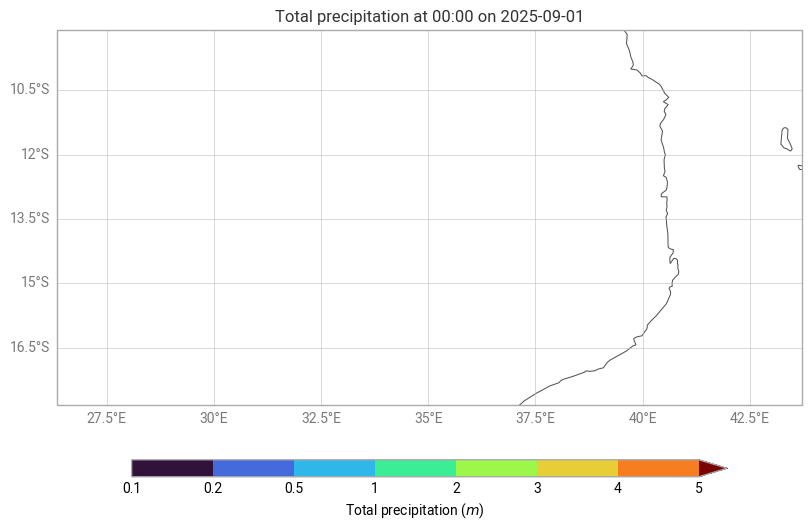

In [31]:
import earthkit.plots
earthkit.plots.quickplot(data_array).show()

### Save to file

Finally, save the downloaded data to a location of your choice:

In [4]:
data.save(...)

NameError: name 'data' is not defined

### How to download data for many months? 

One of the benefits of using earthkit to download CDS data, is that we can loop through the months we are interested in and download all with a single script. Here's one possible way of automatic this process: 

In [5]:
for x in []:
    print(x)